### CSE 5243 Introduction to Data Mining (SP18)
# Lab 1: Exploratory Data Analysis
Yuxiao Zhao <zhao.2379@osu.edu>  by January 29 2018

## Part 1. Get the data

The dataset used in this lab is [Adult dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). This includes datafile and dataset description.
Please upload the [adult.data.txt](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) and [adult.names.txt](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names) to your jupyter notebook folder.

## Part 2. Understand the data in context

### Data collection objectives

* This data was originally collected by [US Census Bureau](https://www.census.gov/en.html) to provide basic survey information about the population in the US.
* It was then extacted from the 1994 Census database by Barry Becker for a data mining task -- classification and/or prediction, which is, to determine whether income exceeds 50,000 per year based on the census data. 
* Each record represents one sample individual **with age larger than 16, adjusted gross income larger than 100, final weight larger than 1 and work hours per week larger than 0** in the United States.

### Data mining tasks
* The essential question that the data mining task seeks to answer is whether there is certain relationship between socioeconomic and demongraphic attributes (or other attributes from census data) and personal gross income and whether the individual income is above 50,000 based on these attributes. This dataset are also used to answer whether a variety of classification methods (e.g., Nearest neighbor, Naive Bayes, etc.) could accurately predict and classify the population into two groups with income above or below 50,000.
* Other questions we might be able to answer is: (1) Are there any clusters of the population in this dataset which share similar demongraphic and economic status? (2) What is the certain relationships between the income and these attributes? Which determinant(s) affect the individual income most and how?

### Evaluation
* For the classification task, we could divide the dataset into training set and testing set. Then we can estimate the error rate by using the testing data and the model that we have trained. If the accuracy is high or error rate is low, it means we mine some pattern from the data. To validate the result, we should further interprete the classification result, and see how these determinants correspond to high or low income and whether it could be explained by the domain knowledge. If the pattern contributes to some valid findings, e.g., people of the certain range of age earn the most, this would be a useful data mining result.
* The effectiveness of a good analysis could be measured by: (1) data quality: to check if the data is cleaned (2) data preprocessing: to check if the attributes are selected and preprocessed properly (3) data analysis: to select appropriate method to mine the data (4) performance evaluate: to evaluate and validate the classification result by indicator such as error rate (5)visualization: to represent and visualize the result in an effective way.



## Part 3. Understand the data

### Codebook
This part includes the description and summary of the meaning and type of data for each attribute. The descriptions also include some basic statistics, such as the range of values, scale, minimums, maximums, and so forth, as appropriate.

#### adult.data.txt
This file contains demographic and socioeconomic census data of individuals in the US. There are 15 attributes, including age, work class, final weight, education, education number, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, native country and gross income.


Pos.|Variable|Type(categoric/numeric)|Type(binary/discrete/continuous)|Description
---:|---|:---:|---|---
1|age|numeric|continuous|the age of the individual (at least 17)
2|work class|categoric|discrete|the type of employer such as self-employed or federal (8 unique values)
3|final weight|numeric|continuous|a demographic score assigned to an individual based on information such as race and age
4|education|categoric|discrete|the highest level of education attained such as high school or doctorate (16 unique values)
5|education number|numeric|continuous|numeric representation of the education attribute
6|marital status|categoric|discrete|a person's status of being married or separated (7 unique values)
7|occupation|categoric|discrete|the employment type such as farming, clerical or managerial (14 unique values)
8|relationship|categoric|discrete|the relationship within a family, such as wife or husband (6 unique values)
9|race|categoric|discrete|race such as white or black (5 unique values)
10|sex|categoric|binary|"male" and "female" (2 unique values)
11|capital gain|numeric|continuous|a profit from the sale of an property or of an investment
12|capital loss|numeric|continuous|the loss incurred when a capital asset decreases in value
13|hours per week|numeric|continuous|the working hours per week
14|native country|categoric|discrete|the country where the individual was born (41 unique values)
15|gross income|categoric|binary|a label whether the income exceeds 50,000

### Data quality
Check the missing value, duplicate and outliers.

#### read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the txt file
df_adult = pd.read_table('adult.data.txt',header = None, names = ["age","work class","final weight","education","education number","marital status",
                                                  "occupation","relationship","race","sex","capital gain","capital loss","hours per week",
                                                  "native country","gross income"],delimiter=', ')

d:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                 32561 non-null int64
work class          32561 non-null object
final weight        32561 non-null int64
education           32561 non-null object
education number    32561 non-null int64
marital status      32561 non-null object
occupation          32561 non-null object
relationship        32561 non-null object
race                32561 non-null object
sex                 32561 non-null object
capital gain        32561 non-null int64
capital loss        32561 non-null int64
hours per week      32561 non-null int64
native country      32561 non-null object
gross income        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 32561 records with 15 attributes.

#### missing value

In [4]:
# check the missing value in the three columns
df_adult[(df_adult['work class']=='?') | (df_adult['education']=='?') | (df_adult['occupation']=='?')]

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


The missing value in the dataset is represented as "?".

In [5]:
# replace "?" with nan
df_adult = df_adult.replace('?', np.nan)

In [6]:
# summarize the number of missing values in each attribute
df_adult.isnull().sum() 

age                    0
work class          1836
final weight           0
education              0
education number       0
marital status         0
occupation          1843
relationship           0
race                   0
sex                    0
capital gain           0
capital loss           0
hours per week         0
native country       583
gross income           0
dtype: int64

There are 1836 missing values in "work class", 1843 in "occupation" and 583 in "native country".

In [7]:
# if we need to delete the missing value from the dataset
# df_adult = df_adult.dropna(axis=0, how='any')

#### duplicates

In [8]:
df_adult[df_adult.duplicated()].sample(5)

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
25872,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K
22367,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
28522,42,Private,204235,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
29157,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K


In [9]:
df_adult[df_adult.duplicated()].shape

(24, 15)

There are 24 duplicates in the dataset, but we do not need to eliminate these records, as each represents one individual.

#### outliers

In [10]:
# to detect the outliers for capital gain
from scipy import stats
df_adult[(np.abs(stats.zscore(df_adult['capital gain']) > 3))]

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
704,46,Private,295566,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Female,25236,0,65,United-States,>50K
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1562,75,NaN,111177,Bachelors,13,Widowed,NaN,Not-in-family,White,Female,25124,0,16,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1682,43,Private,176270,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K
1764,46,Private,133938,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,27828,0,50,United-States,>50K


For capital gain, 99999 is an abnormal value--outlier. This could be an data entering mistake. So we delete these outliers.

In [11]:
# if we need to delete the outliers of capital gain
# df_adult = df_adult[df_adult['capital gain']<99999]

In [12]:
# to detect the outliers for capital loss
df_adult[(np.abs(stats.zscore(df_adult['capital loss']) > 3))]

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
112,56,Self-emp-not-inc,335605,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,1887,50,Canada,>50K
126,20,Private,111697,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1719,28,United-States,<=50K
131,24,Private,43323,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,1762,40,United-States,<=50K
143,45,Private,196584,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,1564,40,United-States,>50K
148,64,Private,181232,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2179,40,United-States,<=50K


In [13]:
# to detect the outliers for age
df_adult[(np.abs(stats.zscore(df_adult['age']) > 3))]

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,NaN,107762,HS-grad,9,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1168,88,Self-emp-not-inc,206291,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
2754,80,Self-emp-not-inc,184335,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
2906,81,Private,114670,9th,5,Widowed,Priv-house-serv,Not-in-family,Black,Female,2062,0,5,United-States,<=50K


In [14]:
# to detect the outliers for final weight
df_adult[(np.abs(stats.zscore(df_adult['final weight']) > 3))]

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K
182,30,Private,633742,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,45,United-States,<=50K
192,41,Local-gov,523910,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
215,37,Private,635913,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,60,United-States,>50K
230,35,Private,538583,11th,7,Separated,Transport-moving,Not-in-family,Black,Male,3674,0,40,United-States,<=50K
312,19,NaN,860348,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,25,United-States,<=50K
414,31,State-gov,1033222,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
508,47,Local-gov,543162,HS-grad,9,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
651,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,4101,0,50,United-States,<=50K


In [15]:
# to detect the outliers for hours per week
df_adult[(np.abs(stats.zscore(df_adult['hours per week']) > 3))]

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
272,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K
299,38,Private,169469,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,80,United-States,<=50K
520,38,Self-emp-inc,99146,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,80,United-States,>50K
589,57,Self-emp-inc,103948,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,80,United-States,<=50K
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1064,49,Private,175958,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,80,United-States,>50K
1066,35,Private,199352,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,80,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K


There also exist outliers for capital loss, age, final weight and hours per week. These outliers do not need to be excluded at this stage. But we can apply a transformation in the future analysis.

In [16]:
df_adult.shape # indicate the dimension the dataset

(32561, 15)

### basic statistics

In [17]:
# show the count, mean, std, min, max, percentile of these numeric attributes.
df_adult[['age','education number','hours per week','capital gain','capital loss']].describe()

,age,education number,hours per week,capital gain,capital loss
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,1077.648844,87.303830
std,13.640433,2.572720,12.347429,7385.292085,402.960219
min,17.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,99999.000000,4356.000000


These statistics are important to show the basic distribution of the attributes which may affect the income greatly. We find these individuals are from 17 to 90 years old, with education number from 1 to 16 years, most of which work around 40 hours a week. Most of them do not have capital gain or loss, but few of them have many.This may influence the classification result a lot.

In [18]:
# The count,unique value,mode and frequency of categorical value.
df_adult[['occupation','work class','education','gross income']].describe()

,occupation,work class,education,gross income
count,30718,30725,32561,32561
unique,14,8,16,2
top,Prof-specialty,Private,HS-grad,<=50K
freq,4140,22696,10501,24720


This is interesting as it shows the top of the categorical values. For example, individuals who graduate from high school, work in a private sector,or work in the field of prof-specialty count the most. We could also estimate the percentage of people whose income exceeds 50,000.

### visualization

#### occupation

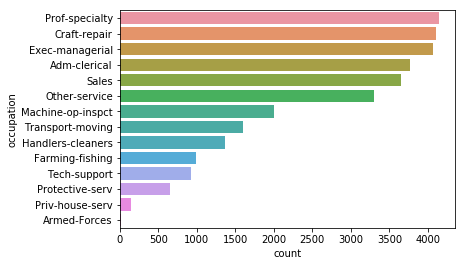

In [19]:
# Get frequencies of each value of 'occupation'.
# We'll use this to order the categories in the chart.
import seaborn as sns
occu = df_adult['occupation'].value_counts()
sns.countplot(data=df_adult, y='occupation', order=occu.index)

This plot shows the counts of different classes of occupation, we could see the three most popular are prof-specialty, craft-repair and exec-managerial. It gives us a more detailed and straightforward demostration of the occupation class. We could assume if there is significant difference of incomes of individuals of these various occupation.

#### education

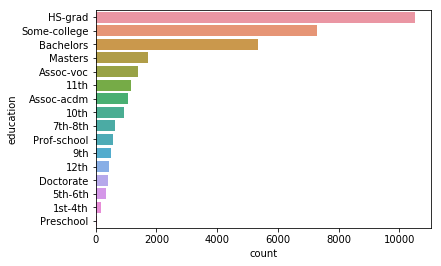

In [20]:
# Get frequencies of each value of 'education'.
# We'll use this to order the categories in the chart.
import seaborn as sns
edu = df_adult['education'].value_counts()
sns.countplot(data=df_adult, y='education', order=edu.index)

This plot shows that majority of the individuals receive high school, some college or bachelors' education. An assumption is that education is closely related to salary. This plot shows the distribution of the counts of different education levels, which is useful in future analysis.

#### age

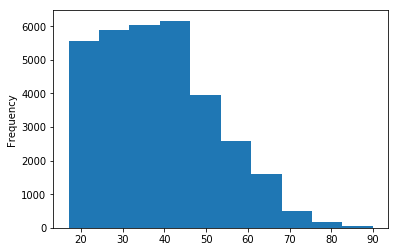

In [21]:
# To show a histogram of age
df_adult['age'].plot.hist()

The distribution of age is right-skewed, with left-side long tail. It has one peak from 40 to 45. In this case, as we collect data only from those who are larger than 17, it shows this skewed pattern. The outliers of age may influence the prediction model.

#### education number

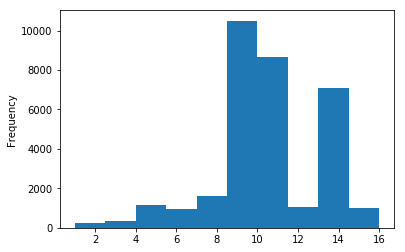

In [22]:
# To show a histogram of educaiton number
df_adult['education number'].plot.hist()

The distribution of education number is left-skewed. It has two peaks: One if around 10 and the other is 14, indicating the education of the majority. The left tail shows there are few people who have education number fewer than 6.

#### hours per week

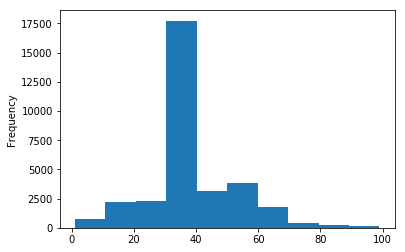

In [23]:
# To show a histogram of hours per week
df_adult['hours per week'].plot.hist()

The distribution of hours per week is normalized and the peak point is a little bit below 40 hours.Regularly, most people work for 30 to 50 hours a week.

#### capital gain

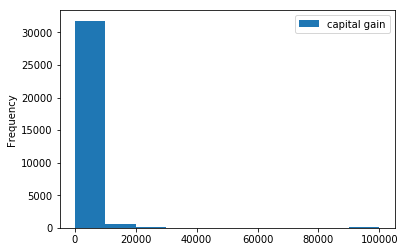

In [24]:
# To show a histogram of capital gain
df_adult[['capital gain']].plot.hist()

Capital gain might be closely related to income. However, this attribute is extremely right skewed: most of people gain less than 10000 and few gain more than 10000.

### relationships among numeric attributes

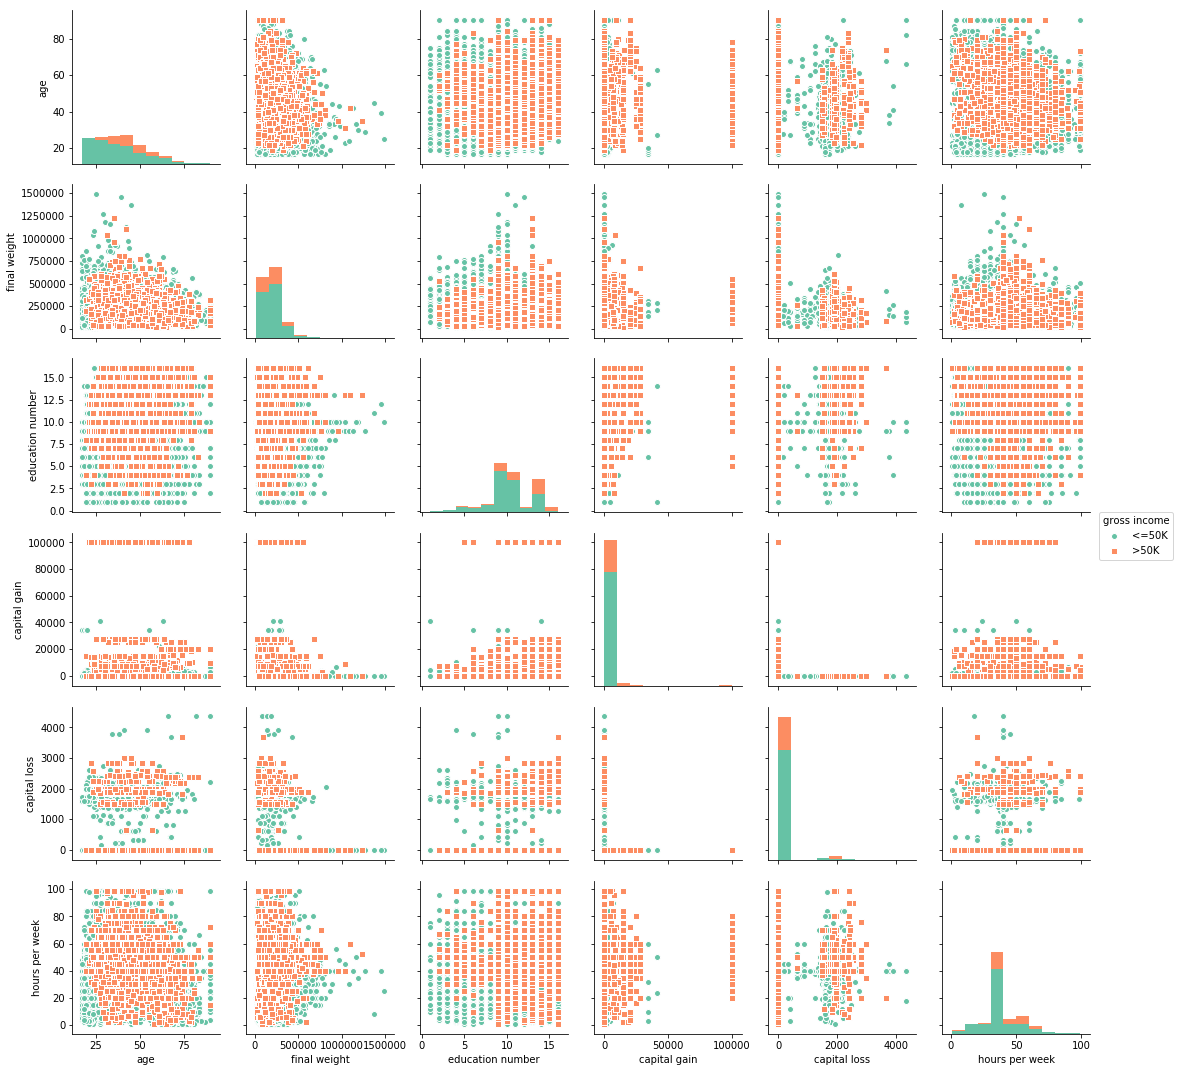

In [25]:
# scatter plot
sns.pairplot(df_adult, kind="scatter", hue="gross income", markers=["o", "s"], palette="Set2")

The scatter plot shows that the value of these attributes are very discrete.There is no obvious correlation between these numeric variables. Capital gain and loss are very skewed. We could also analysed the relationships between income and these attributes by observing the color of the dots. This will be demonstrated in next section.

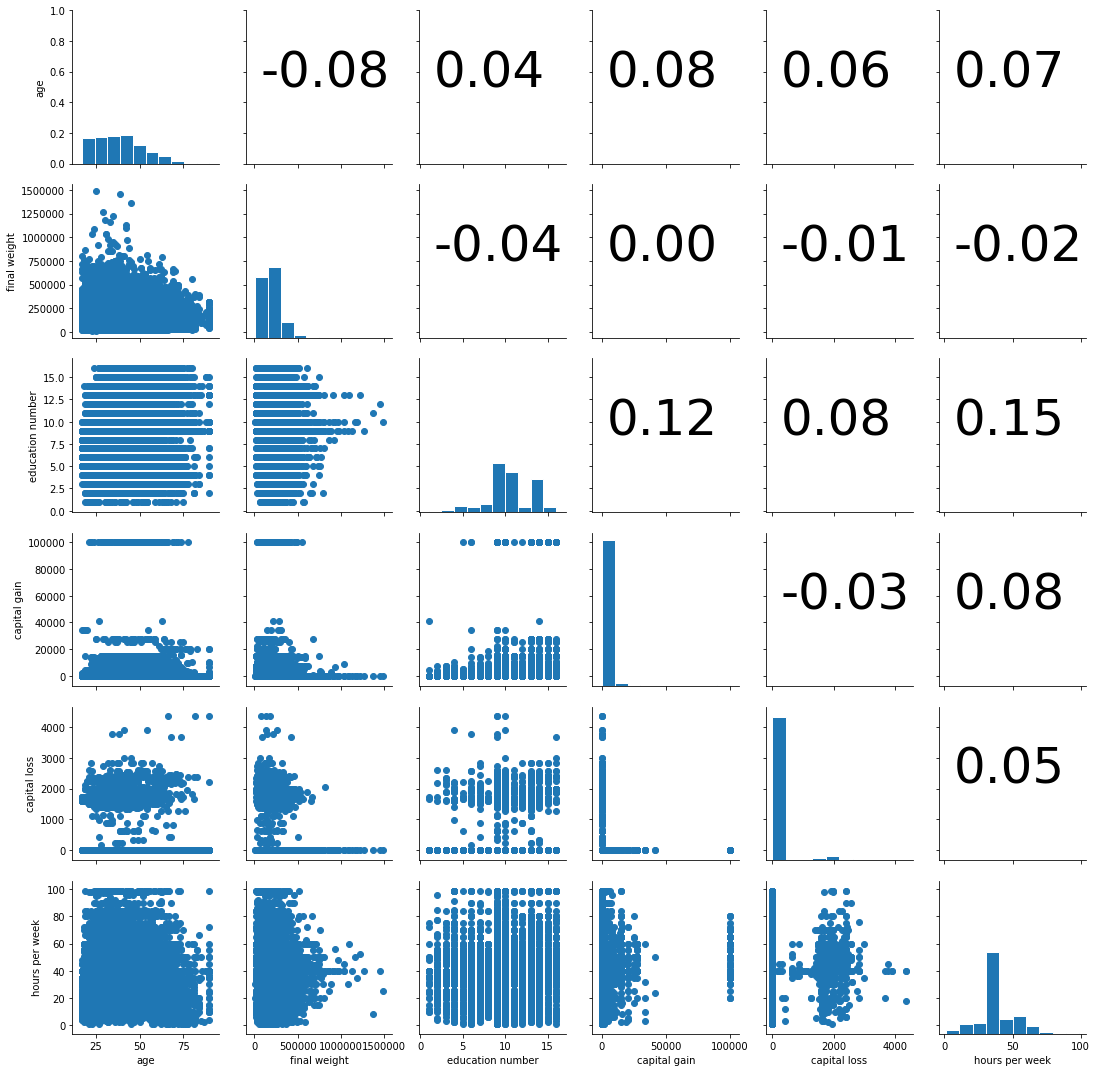

In [26]:
# correlation matrix
import scipy as sp
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy=(.1, .5), xycoords=ax.transAxes, size=50)

g = sns.PairGrid(df_adult)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)

The correlation matrix shows there is very low correlation among these variables.The correlation between hours per week and education number is relatively high, indicating the postive relationship between these two.

### relationships among class attributes

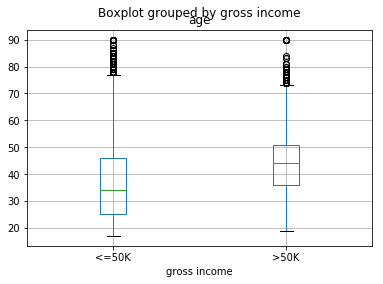

In [27]:
# age box plot by income
df_adult.boxplot(column='age', by='gross income')

The age of the group with income above 50,000 is significantly larger than that with income below 50,000. The former has a median of about 45, while the latter has the median of about 34. This indicates the positive relationship between age and income.

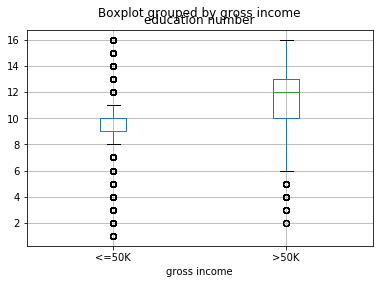

In [28]:
# education number by income
df_adult.boxplot(column='education number', by='gross income')

The education number of the group with income above 50,000 is significantly larger than that with income below 50,000. The former has a median of 12, while the latter has the median of about 9.5. This indicates the postive relationship between education number and income.

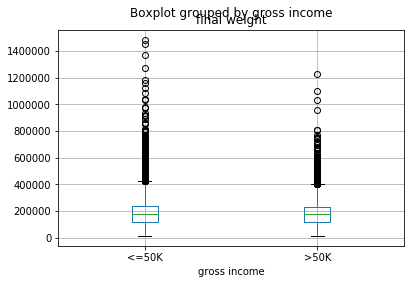

In [29]:
# final weight by income
df_adult.boxplot(column='final weight', by='gross income')

There is no significant difference between the final weight (indicates the demongraphic factors) and the income.

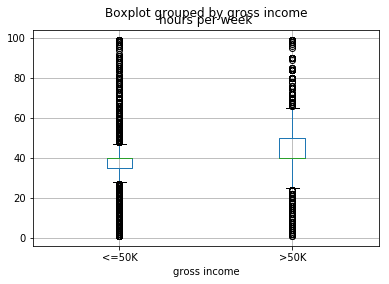

In [30]:
# working hours by income
df_adult.boxplot(column='hours per week', by='gross income')

The working hours of the group with income above 50,000 is significantly longer than those with income below 50,000. The former has a median of more than 40, while the latter has the median of smaller than 40. This indicates the postive relationship between working hours and income.

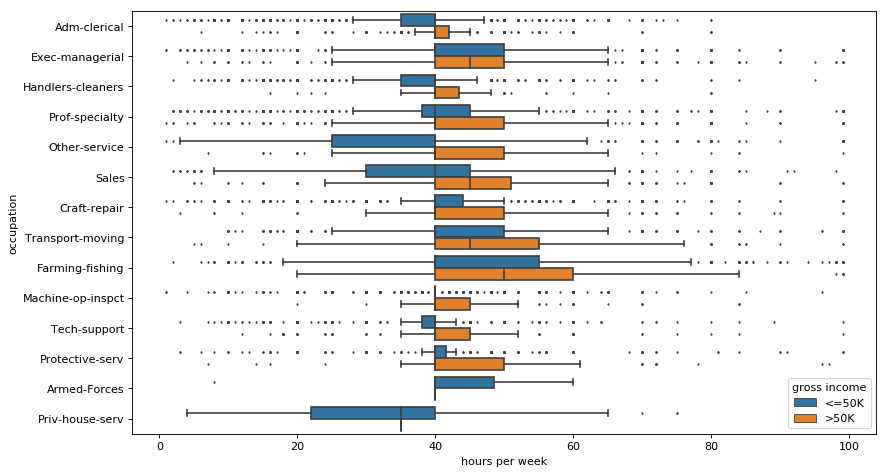

In [31]:
plt.figure(num=None, figsize=(12, 7),dpi=80)
plt.clf()
sns.boxplot(y="occupation", x="hours per week", hue="gross income", data=df_adult, fliersize=1.2)
plt.show()

This plot shows the relationship between working hours and occupation grouped by income. Some occupations, such as farming-fishing, tend to require longer work hours.

### other attributes to be added

* the size of the city where the individual works (categorical: large, medium or small)
* the years of work experience (numeric and continuous)
* the size of the company (categorical)
* age groups (transformed from age: 17-22, 23-28, etc.)
* capital gain categories (below 10000, 10000-20000, above 20000)
* capital loss categories (below 1000, 1000-2000, above 2000)

## Part 4. Exceptional work

### PCA

In [32]:
from sklearn import decomposition
from sklearn import datasets

In [33]:
df_adult.head()

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,gross income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# Extract the continuous attributes to a matrix X
X = df_adult.iloc[:,[0,2,4,10,11,12]].values

In [35]:
# normalize the data before PCA
X_norm = np.zeros(shape=(32561,6))
for i in range(6):
    X_norm[:,i]=np.array((X[:,i]-np.mean(X[:,i]))/np.std(X[:,i]))

In [36]:
# Extract the class attribute as y
y = df_adult.iloc[:,14].astype('category').values

In [37]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_norm)
X_fit = pca.transform(X_norm)

In [38]:
print('Total Variance explained by 3 principal components: %.2f%%' % ( sum(pca.explained_variance_ratio_) * 100))

Total Variance explained by 3 principal components: 56.17%


In [39]:
# Put principal components into a data frame so we can plot it.
dfpc = pd.DataFrame(X_fit, columns=['pc1', 'pc2','pc3'])
dfpc['income'] = y

In [40]:
dfpc.head() # display the data after dimensionality reduction

,pc1,pc2,pc3,income
0,0.846167,-0.200698,-0.509772,<=50K
1,-0.097195,-0.903884,-1.156443,<=50K
2,-0.435844,0.101774,-0.040832,<=50K
3,-0.480503,-0.325925,-0.539101,<=50K
4,-0.105086,1.266394,1.186408,<=50K


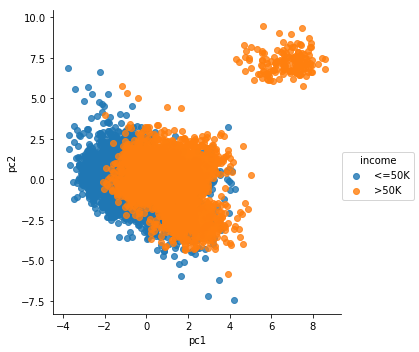

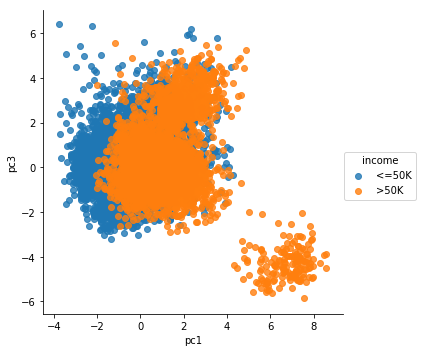

In [41]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="pc1", y="pc2", fit_reg=False, hue='income')
sns.lmplot(data=dfpc, x="pc1", y="pc3", fit_reg=False, hue='income')
plt.show()

We extracted three main components from the raw data, which explain 56.17% of the variance of the original attributes. This may not be a good case for the PCA, as the original six attributes are quite independent from each other. The explained variance is relatively low compared to the typical PCA transformation. But from the plot above, we could identify that high income group tend to correlate postively with the first component a lot. There are two clusters in the plot, indicating there may be effects of outliers in the model.